In [4]:
from pathlib import Path
import pandas as pd
import numpy as np
from scipy.signal import correlate

DATA_DIR = Path('dataset')
INSTRS = ['BTC', 'ETH', 'ADA']
CSV_MAP = {ins: DATA_DIR / f"{ins}_5min.csv" for ins in INSTRS}

In [5]:
dfs = {}
for ins in INSTRS:
    path = CSV_MAP[ins]
    if path.exists():
        print(f'Loading {ins} from {path}')
        df = pd.read_csv(path)
        df['timestamp'] = pd.to_datetime(df["system_time"])
        df['timestamp'] = df['timestamp'].dt.round('min')
        df = df.sort_values('timestamp')
        df['log_return'] = np.log(df['midpoint']).diff() # NEW IMPORTANT METRIC: log returns
        dfs[ins] = df
    else:
        print(f'⚠️ File not found: {path} — skipping.')
print(f"Loaded {len(dfs)} instruments: {list(dfs.keys())}")
for ins, df in dfs.items():
    print(f"{ins}: {df.shape[0]} rows, {df.shape[1]} columns")
    display(df.head(3))

Loading BTC from dataset/BTC_5min.csv
Loading ETH from dataset/ETH_5min.csv
Loading ADA from dataset/ADA_5min.csv
Loaded 3 instruments: ['BTC', 'ETH', 'ADA']
BTC: 3367 rows, 158 columns


,Unnamed: 0,system_time,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,...,asks_market_notional_7,asks_market_notional_8,asks_market_notional_9,asks_market_notional_10,asks_market_notional_11,asks_market_notional_12,asks_market_notional_13,asks_market_notional_14,timestamp,log_return
0,0,2021-04-07 11:37:41.122161+00:00,55899.995,0.01,1.199304e+07,1.348616e+07,-8.944544e-08,-1.294276e-04,-0.000130,-0.000143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-04-07 11:38:00+00:00,NaN
1,1,2021-04-07 11:42:41.122161+00:00,56111.655,0.01,1.029537e+07,5.020347e+06,-8.910805e-08,-1.011376e-04,-0.000207,-0.000208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-04-07 11:43:00+00:00,0.003779
2,2,2021-04-07 11:47:41.122161+00:00,56100.015,0.01,3.825363e+06,4.640026e+06,-8.912654e-08,-2.673796e-07,-0.000384,-0.000410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-04-07 11:48:00+00:00,-0.000207


ETH: 3365 rows, 158 columns


,Unnamed: 0,system_time,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,...,asks_market_notional_7,asks_market_notional_8,asks_market_notional_9,asks_market_notional_10,asks_market_notional_11,asks_market_notional_12,asks_market_notional_13,asks_market_notional_14,timestamp,log_return
0,0,2021-04-07 11:37:49.861733+00:00,1970.965,0.49,3.160851e+06,5.002265e+06,-0.000124,-0.000129,-0.000200,-0.000246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-04-07 11:38:00+00:00,NaN
1,1,2021-04-07 11:42:49.861733+00:00,1975.115,0.21,2.988116e+06,1.330157e+06,-0.000053,-0.000058,-0.000063,-0.000261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-04-07 11:43:00+00:00,0.002103
2,2,2021-04-07 11:47:49.861733+00:00,1969.295,0.03,5.059067e+06,4.825176e+06,-0.000008,-0.000221,-0.000388,-0.000515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-04-07 11:48:00+00:00,-0.002951


ADA: 3367 rows, 158 columns


,Unnamed: 0,system_time,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,...,asks_market_notional_7,asks_market_notional_8,asks_market_notional_9,asks_market_notional_10,asks_market_notional_11,asks_market_notional_12,asks_market_notional_13,asks_market_notional_14,timestamp,log_return
0,0,2021-04-07 11:37:59.055697+00:00,1.17255,0.0009,330639.048591,500585.424671,-0.000384,-0.000469,-0.000810,-0.000981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-04-07 11:38:00+00:00,NaN
1,1,2021-04-07 11:42:59.055697+00:00,1.18390,0.0014,264189.090154,139303.543714,-0.000591,-0.000676,-0.000929,-0.001098,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-04-07 11:43:00+00:00,0.009633
2,2,2021-04-07 11:47:59.055697+00:00,1.17830,0.0014,230631.852305,226685.612231,-0.000594,-0.000764,-0.000849,-0.000934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-04-07 11:48:00+00:00,-0.004741


In [23]:
# Compute metrics for first 3 levels and all 15 levels
## Order Imbalance
## depth ratio
for ins in dfs:
    # Near levels (0–2)
    bid_cols_near = [f"bids_notional_{i}" for i in range(3)]
    ask_cols_near = [f"asks_notional_{i}" for i in range(3)]
    
    # Full depth (0–14)
    bid_cols_full = [f"bids_notional_{i}" for i in range(15)]
    ask_cols_full = [f"asks_notional_{i}" for i in range(15)]
    
    # Sum notional values across levels
    dfs[ins]['bid_total_near'] = dfs[ins][bid_cols_near].sum(axis=1)
    dfs[ins]['ask_total_near'] = dfs[ins][ask_cols_near].sum(axis=1)
    dfs[ins]['bid_total_full'] = dfs[ins][bid_cols_full].sum(axis=1)
    dfs[ins]['ask_total_full'] = dfs[ins][ask_cols_full].sum(axis=1)
    
    # Compute order imbalance for both variants
    dfs[ins]['order_imbalance_near'] = (dfs[ins]['bid_total_near'] - dfs[ins]['ask_total_near']) / (dfs[ins]['bid_total_near'] + dfs[ins]['ask_total_near'])
    dfs[ins]['order_imbalance_full'] = (dfs[ins]['bid_total_full'] - dfs[ins]['ask_total_full']) / (dfs[ins]['bid_total_full'] + dfs[ins]['ask_total_full'])

    # Compute depth ratios
    dfs[ins]['depth_ratio_near'] = dfs[ins]['bid_total_near'] / dfs[ins]['ask_total_near']
    dfs[ins]['depth_ratio_full'] = dfs[ins]['bid_total_full'] / dfs[ins]['ask_total_full']


## 1. Exploring BTC <-> ETH

In [6]:
asset1 = 'BTC'
asset2 = 'ETH'

# Align data by timestamp
merged = pd.merge(dfs[asset1][['timestamp', 'midpoint', 'log_return']], dfs[asset2][['timestamp', 'midpoint', 'log_return']], on='timestamp', suffixes=(f'_{asset1}', f'_{asset2}'))

### 1.1. Pearson correlation (static & rolling)


**How it's calculated:**  
Pearson correlation measures the linear relationship between two variables:
$$
\rho = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y}
$$

**Interpretation:**  
- **High positive (→ +1):** assets move together (both rise or fall).  
- **Near zero:** no linear relation, movements are mostly independent.  
- **Negative (→ -1):** assets move in opposite directions.  

**Why it matters:**  
Shows how synchronized two markets are over time; rolling version reveals changing correlations during different volatility regimes.


In [7]:

# Pearson correlation (static)
pearson_corr = merged[f'midpoint_{asset1}'].corr(merged[f'midpoint_{asset2}'])
print(f"Pearson correlation ({asset1} vs {asset2}): {pearson_corr:.4f}")

# Rolling Pearson correlation (e.g., 3-hour window)
merged['rolling_corr'] = merged[f'midpoint_{asset1}'].rolling(window=36).corr(merged[f'midpoint_{asset2}'])
merged[['timestamp', 'rolling_corr']].dropna().tail()

Pearson correlation (BTC vs ETH): 0.7567


,timestamp,rolling_corr
3360,2021-04-19 09:30:00+00:00,0.963631
3361,2021-04-19 09:35:00+00:00,0.965933
3362,2021-04-19 09:40:00+00:00,0.965393
3363,2021-04-19 09:45:00+00:00,0.964348
3364,2021-04-19 09:50:00+00:00,0.968149


<Axes: title={'center': 'Rolling Pearson Correlation (BTC vs ETH)'}, xlabel='timestamp'>

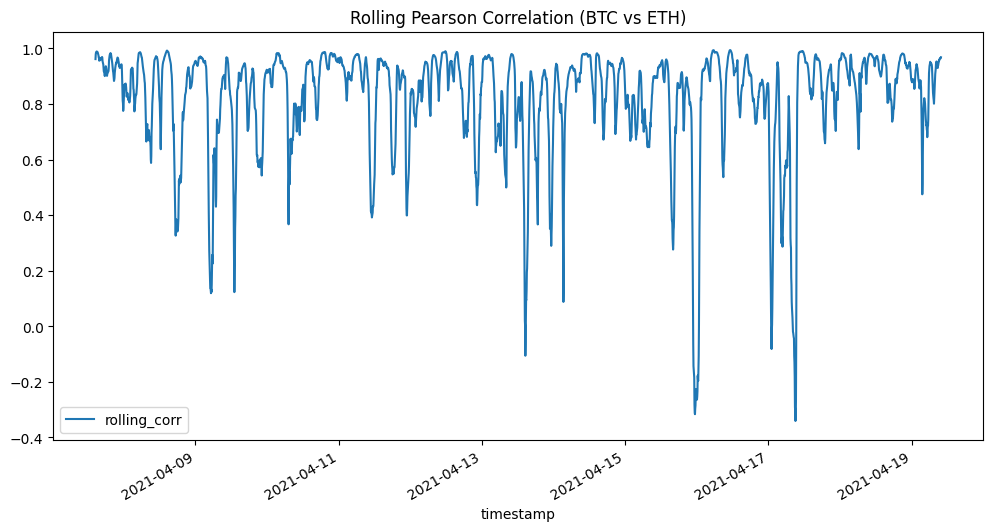

In [8]:
merged[['timestamp', 'rolling_corr']].dropna().plot(x='timestamp', y='rolling_corr', title=f'Rolling Pearson Correlation ({asset1} vs {asset2})', figsize=(12, 6))

### 1.2. Lead-lag correlation (cross-correlation)

**How it's calculated:**  
Cross-correlation compares one series with time-shifted versions of another to find where correlation peaks.  

**Interpretation:**  
- **Positive lag peak:** the second asset reacts *after* the first → possible causality.  
- **Negative lag peak:** the first reacts *after* the second.  
- **Flat curve:** no time-delayed relationship.  

**Why it matters:**  
Helps detect which asset leads or follows market movements — key for forecasting and inter-asset influence modeling.

In [9]:
merged[1:].head() # to avoid NaN in log returns

,timestamp,midpoint_BTC,log_return_BTC,midpoint_ETH,log_return_ETH,rolling_corr
1,2021-04-07 11:43:00+00:00,56111.655,0.003779,1975.115,0.002103,NaN
2,2021-04-07 11:48:00+00:00,56100.015,-0.000207,1969.295,-0.002951,NaN
3,2021-04-07 11:53:00+00:00,56163.445,0.001130,1971.535,0.001137,NaN
4,2021-04-07 11:58:00+00:00,56229.995,0.001184,1974.995,0.001753,NaN
5,2021-04-07 12:03:00+00:00,56119.455,-0.001968,1962.770,-0.006209,NaN


In [ ]:
# Cross-correlation
x = merged['log_return_BTC'][1:] - merged['log_return_BTC'][1:].mean()
y = merged['log_return_ETH'][1:] - merged['log_return_ETH'][1:].mean()
lags = np.arange(-len(x) + 1, len(x))
xcorr = correlate(x, y, mode='full') / (np.std(x) * np.std(y) * len(x))

# Lag with max correlation
best_lag = lags[np.argmax(xcorr)]
print(f"Max correlation at lag: {best_lag} steps ({best_lag*5} min shift)")


Max correlation at lag: 0 steps (0 min shift)


### 1.3. Correlation of returns

**How it's calculated:**  
Pearson correlation applied to **log-returns** instead of prices:  
$$
r_t = \ln(P_t) - \ln(P_{t-1})
$$

**Interpretation:**  
- **High:** assets experience similar price changes.  
- **Low:** price movements are uncorrelated.  
- **Negative:** assets tend to move in opposite directions.  

**Why it matters:**  
Return correlations are more stable and meaningful than price correlations since returns are stationary.


In [22]:
# Pearson correlation of log returns
ret_corr = merged[f'log_return_{asset1}'].corr(merged[f'log_return_{asset2}'])
print(f"Return correlation ({asset1} vs {asset2}): {ret_corr:.4f}")

# Rolling version (e.g., 1 hour = 12 points)
merged['rolling_return_corr'] = merged[f'log_return_{asset1}'].rolling(12).corr(merged[f'log_return_{asset2}'])
merged[['timestamp', 'rolling_return_corr']].dropna().tail()


Return correlation (BTC vs ETH): 0.8498


,timestamp,rolling_return_corr
3360,2021-04-19 09:30:00+00:00,0.965536
3361,2021-04-19 09:35:00+00:00,0.945960
3362,2021-04-19 09:40:00+00:00,0.921285
3363,2021-04-19 09:45:00+00:00,0.925990
3364,2021-04-19 09:50:00+00:00,0.921086


<Axes: title={'center': '1-hour Rolling Return Correlation (BTC vs ETH)'}, xlabel='timestamp'>

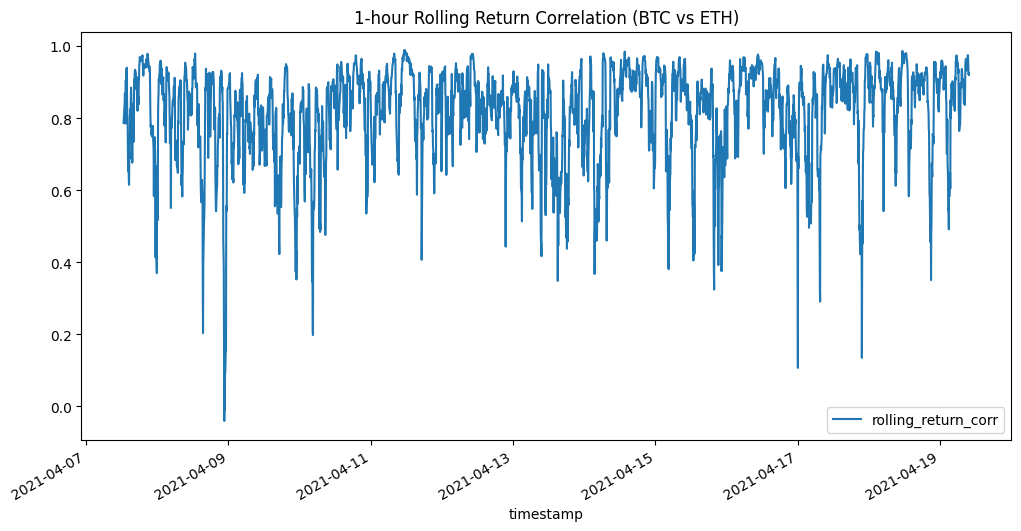

In [21]:
merged[['timestamp', 'rolling_return_corr']].dropna().plot(x='timestamp', y='rolling_return_corr', title=f'1-hour Rolling Return Correlation ({asset1} vs {asset2})', figsize=(12, 6))

### 1.4. Order Imbalance (OI)

**How it's calculated:**  
$$
OI = \frac{\text{Total Bid Volume} - \text{Total Ask Volume}}{\text{Total Bid Volume} + \text{Total Ask Volume}}
$$

**Interpretation:**  
- **Positive:** buy-side pressure (more bids).  
- **Negative:** sell-side pressure (more asks).  
- **Near zero:** balanced market.  

**Why it matters:**  
Captures short-term supply–demand dynamics; strong imbalances often precede price movements or volatility shifts.


In [14]:
# Correlation of OI between assets
merged_oi = pd.merge(dfs[asset1][['timestamp', 'order_imbalance_full', 'order_imbalance_near']], dfs[asset2][['timestamp', 'order_imbalance_full', 'order_imbalance_near']], on='timestamp', suffixes=(f'_{asset1}', f'_{asset2}'))
oi_full_corr = merged_oi[f'order_imbalance_full_{asset1}'].corr(merged_oi[f'order_imbalance_full_{asset2}'])
print(f"Full order imbalance correlation ({asset1} vs {asset2}): {oi_full_corr:.4f}")

oi_near_corr = merged_oi[f'order_imbalance_near_{asset1}'].corr(merged_oi[f'order_imbalance_near_{asset2}'])
print(f"Near order imbalance correlation ({asset1} vs {asset2}): {oi_near_corr:.4f}")

Full order imbalance correlation (BTC vs ETH): 0.2123
Near order imbalance correlation (BTC vs ETH): 0.1242


### 1.5. Depth Ratio

**How it's calculated:**  
$$
DR = \frac{\text{Total Bid Volume}}{\text{Total Ask Volume}}
$$

**Interpretation:**  
- **High (>1):** market depth dominated by buyers.  
- **Low (<1):** dominated by sellers.  
- **Around 1:** balanced liquidity.  

**Why it matters:**  
Represents liquidity asymmetry; correlated depth ratios across assets may indicate shared market-maker behavior or systemic pressure.


In [27]:
# Correlation of depth ratios between assets
merged_depth_near = pd.merge(dfs[asset1][['timestamp', 'depth_ratio_near']], dfs[asset2][['timestamp', 'depth_ratio_near']], on='timestamp', suffixes=(f'_{asset1}', f'_{asset2}'))
depth_corr_near = merged_depth_near[f'depth_ratio_near_{asset1}'].corr(merged_depth_near[f'depth_ratio_near_{asset2}'])  

merged_depth_full = pd.merge(dfs[asset1][['timestamp', 'depth_ratio_full']], dfs[asset2][['timestamp', 'depth_ratio_full']], on='timestamp', suffixes=(f'_{asset1}', f'_{asset2}'))
depth_corr_full = merged_depth_full[f'depth_ratio_full_{asset1}'].corr(merged_depth_full[f'depth_ratio_full_{asset2}'])  

print(f"Depth ratio correlation (near levels) ({asset1} vs {asset2}): {depth_corr_near:.4f}")
print(f"Depth ratio correlation (full levels) ({asset1} vs {asset2}): {depth_corr_full:.4f}")

Depth ratio correlation (near levels) (BTC vs ETH): 0.0531
Depth ratio correlation (full levels) (BTC vs ETH): 0.0700


In [29]:
merged_depth_near[f'log_depth_ratio_near_{asset1}'] = np.log1p(merged_depth_near[f'depth_ratio_near_{asset1}'])
merged_depth_near[f'log_depth_ratio_near_{asset2}'] = np.log1p(merged_depth_near[f'depth_ratio_near_{asset2}'])
merged_depth_near.head()

,timestamp,depth_ratio_near_BTC,depth_ratio_near_ETH,log_depth_ratio_near_BTC,log_depth_ratio_near_ETH
0,2021-04-07 11:38:00+00:00,0.018981,13.859202,0.018803,2.698619
1,2021-04-07 11:43:00+00:00,0.348026,10.398116,0.298641,2.433448
2,2021-04-07 11:48:00+00:00,0.503307,0.162366,0.407668,0.150457
3,2021-04-07 11:53:00+00:00,0.104620,0.130516,0.099501,0.122674
4,2021-04-07 11:58:00+00:00,0.046015,0.041217,0.044988,0.040390


<Axes: title={'center': 'Log scaled Depth Ratios Near Levels (BTC vs ETH)'}, xlabel='timestamp'>

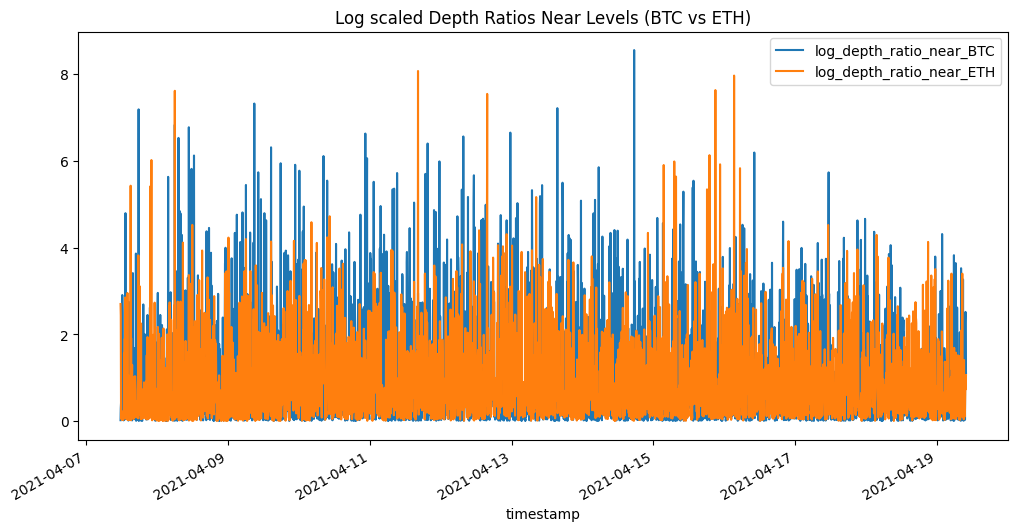

In [31]:
merged_depth_near.plot(x='timestamp', y=[f'log_depth_ratio_near_{asset1}', f'log_depth_ratio_near_{asset2}'], title=f'Log scaled Depth Ratios Near Levels ({asset1} vs {asset2})', figsize=(12, 6))

### 1.6. Exponentially weighted correlation (EWM)

**How it's calculated:**  
Applies exponential weighting to past data when computing covariance and variance, giving more weight to recent observations.

**Interpretation:**  
- **High recent correlation:** assets co-move closely in the short term.  
- **Falling correlation:** decoupling between assets.  
- **Negative correlation:** short-term divergence.  

**Why it matters:**  
Captures rapidly changing relationships and is robust to regime shifts — useful for adaptive trading or TGNN temporal edge weighting.


In [19]:
cov = merged['log_return_BTC'].ewm(span=24).cov(merged['log_return_ETH'])
var_btc = merged['log_return_BTC'].ewm(span=24).var()
var_eth = merged['log_return_ETH'].ewm(span=24).var()

merged['ewm_corr'] = cov / np.sqrt(var_btc * var_eth)
merged[['timestamp', 'ewm_corr']].dropna().tail()

,timestamp,ewm_corr
3360,2021-04-19 09:30:00+00:00,0.929502
3361,2021-04-19 09:35:00+00:00,0.938649
3362,2021-04-19 09:40:00+00:00,0.921869
3363,2021-04-19 09:45:00+00:00,0.922792
3364,2021-04-19 09:50:00+00:00,0.927885


<Axes: title={'center': 'Exponentially Weighted Correlation (BTC vs ETH)'}, xlabel='timestamp'>

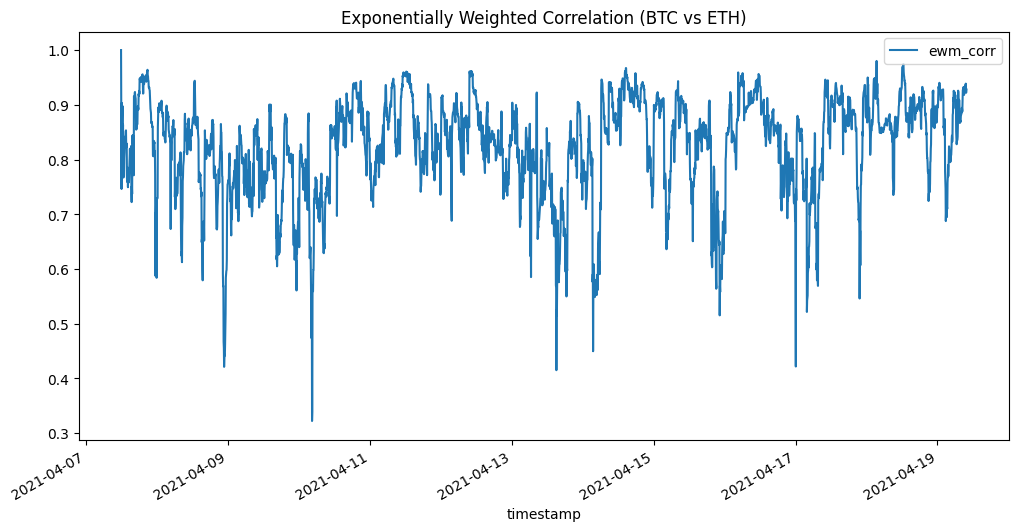

In [20]:
merged[['timestamp', 'ewm_corr']].dropna().plot(x='timestamp', y='ewm_corr', title=f'Exponentially Weighted Correlation ({asset1} vs {asset2})', figsize=(12, 6))

## 2. Exploring ETH <-> ADA

In [33]:
asset1 = 'ETH'
asset2 = 'ADA'

# Align data by timestamp
merged = pd.merge(dfs[asset1][['timestamp', 'midpoint', 'log_return']], dfs[asset2][['timestamp', 'midpoint', 'log_return']], on='timestamp', suffixes=(f'_{asset1}', f'_{asset2}'))

### 2.1. Pearson correlation (static & rolling)


**How it's calculated:**  
Pearson correlation measures the linear relationship between two variables:
$$
\rho = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y}
$$

**Interpretation:**  
- **High positive (→ +1):** assets move together (both rise or fall).  
- **Near zero:** no linear relation, movements are mostly independent.  
- **Negative (→ -1):** assets move in opposite directions.  

**Why it matters:**  
Shows how synchronized two markets are over time; rolling version reveals changing correlations during different volatility regimes.


In [34]:

# Pearson correlation (static)
pearson_corr = merged[f'midpoint_{asset1}'].corr(merged[f'midpoint_{asset2}'])
print(f"Pearson correlation ({asset1} vs {asset2}): {pearson_corr:.4f}")

# Rolling Pearson correlation (e.g., 3-hour window)
merged['rolling_corr'] = merged[f'midpoint_{asset1}'].rolling(window=36).corr(merged[f'midpoint_{asset2}'])
merged[['timestamp', 'rolling_corr']].dropna().tail()

Pearson correlation (ETH vs ADA): 0.9353


,timestamp,rolling_corr
3359,2021-04-19 09:25:00+00:00,0.726885
3360,2021-04-19 09:30:00+00:00,0.756461
3361,2021-04-19 09:35:00+00:00,0.771860
3362,2021-04-19 09:40:00+00:00,0.783812
3363,2021-04-19 09:45:00+00:00,0.800127


<Axes: title={'center': 'Rolling Pearson Correlation (ETH vs ADA)'}, xlabel='timestamp'>

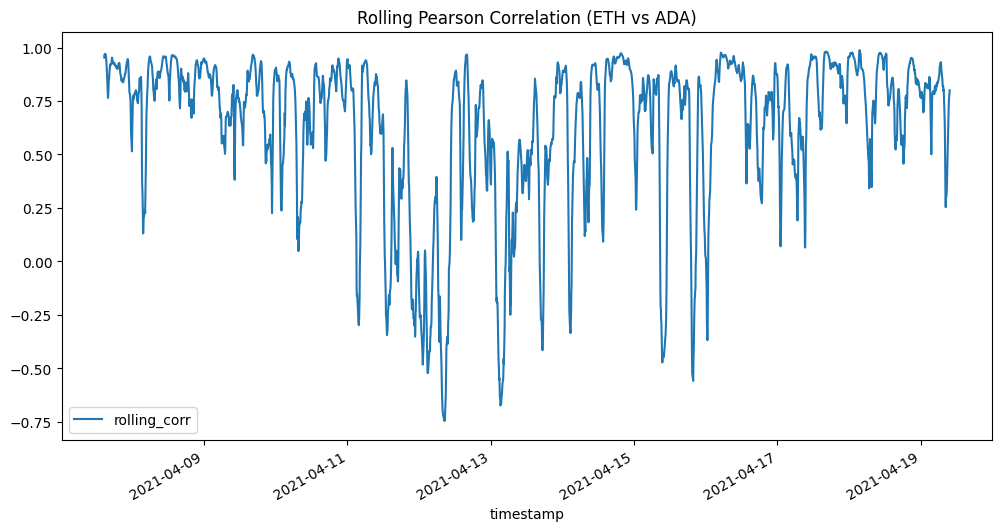

In [35]:
merged[['timestamp', 'rolling_corr']].dropna().plot(x='timestamp', y='rolling_corr', title=f'Rolling Pearson Correlation ({asset1} vs {asset2})', figsize=(12, 6))

### 2.2. Lead-lag correlation (cross-correlation)

**How it's calculated:**  
Cross-correlation compares one series with time-shifted versions of another to find where correlation peaks.  

**Interpretation:**  
- **Positive lag peak:** the second asset reacts *after* the first → possible causality.  
- **Negative lag peak:** the first reacts *after* the second.  
- **Flat curve:** no time-delayed relationship.  

**Why it matters:**  
Helps detect which asset leads or follows market movements — key for forecasting and inter-asset influence modeling.

In [36]:
merged[1:].head() # to avoid NaN in log returns

,timestamp,midpoint_ETH,log_return_ETH,midpoint_ADA,log_return_ADA,rolling_corr
1,2021-04-07 11:43:00+00:00,1975.115,0.002103,1.18390,0.009633,NaN
2,2021-04-07 11:48:00+00:00,1969.295,-0.002951,1.17830,-0.004741,NaN
3,2021-04-07 11:53:00+00:00,1971.535,0.001137,1.18150,0.002712,NaN
4,2021-04-07 11:58:00+00:00,1974.995,0.001753,1.19330,0.009938,NaN
5,2021-04-07 12:03:00+00:00,1962.770,-0.006209,1.18365,-0.008120,NaN


In [38]:
# Cross-correlation
x = merged[f'log_return_{asset1}'][1:] - merged[f'log_return_{asset1}'][1:].mean()
y = merged[f'log_return_{asset2}'][1:] - merged[f'log_return_{asset2}'][1:].mean()
lags = np.arange(-len(x) + 1, len(x))
xcorr = correlate(x, y, mode='full') / (np.std(x) * np.std(y) * len(x))

# Lag with max correlation
best_lag = lags[np.argmax(xcorr)]
print(f"Max correlation at lag: {best_lag} steps ({best_lag*5} min shift)")


Max correlation at lag: 0 steps (0 min shift)


### 2.3. Correlation of returns

**How it's calculated:**  
Pearson correlation applied to **log-returns** instead of prices:  
$$
r_t = \ln(P_t) - \ln(P_{t-1})
$$

**Interpretation:**  
- **High:** assets experience similar price changes.  
- **Low:** price movements are uncorrelated.  
- **Negative:** assets tend to move in opposite directions.  

**Why it matters:**  
Return correlations are more stable and meaningful than price correlations since returns are stationary.


In [39]:
# Pearson correlation of log returns
ret_corr = merged[f'log_return_{asset1}'].corr(merged[f'log_return_{asset2}'])
print(f"Return correlation ({asset1} vs {asset2}): {ret_corr:.4f}")

# Rolling version (e.g., 1 hour = 12 points)
merged['rolling_return_corr'] = merged[f'log_return_{asset1}'].rolling(12).corr(merged[f'log_return_{asset2}'])
merged[['timestamp', 'rolling_return_corr']].dropna().tail()


Return correlation (ETH vs ADA): 0.5757


,timestamp,rolling_return_corr
3359,2021-04-19 09:25:00+00:00,0.838177
3360,2021-04-19 09:30:00+00:00,0.815533
3361,2021-04-19 09:35:00+00:00,0.696930
3362,2021-04-19 09:40:00+00:00,0.643933
3363,2021-04-19 09:45:00+00:00,0.644983


<Axes: title={'center': '1-hour Rolling Return Correlation (ETH vs ADA)'}, xlabel='timestamp'>

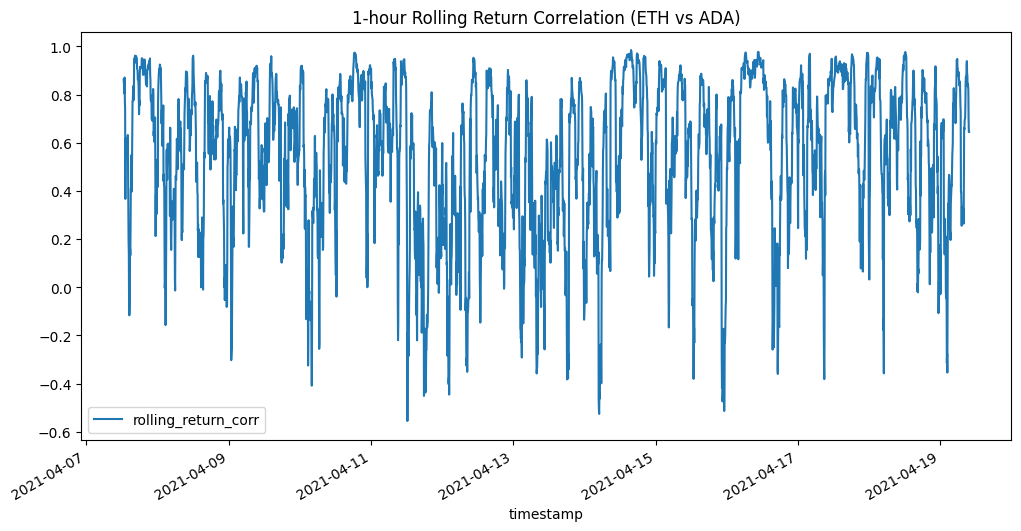

In [40]:
merged[['timestamp', 'rolling_return_corr']].dropna().plot(x='timestamp', y='rolling_return_corr', title=f'1-hour Rolling Return Correlation ({asset1} vs {asset2})', figsize=(12, 6))

### 2.4. Order Imbalance (OI)

**How it's calculated:**  
$$
OI = \frac{\text{Total Bid Volume} - \text{Total Ask Volume}}{\text{Total Bid Volume} + \text{Total Ask Volume}}
$$

**Interpretation:**  
- **Positive:** buy-side pressure (more bids).  
- **Negative:** sell-side pressure (more asks).  
- **Near zero:** balanced market.  

**Why it matters:**  
Captures short-term supply–demand dynamics; strong imbalances often precede price movements or volatility shifts.


In [41]:
# Correlation of OI between assets
merged_oi = pd.merge(dfs[asset1][['timestamp', 'order_imbalance_full', 'order_imbalance_near']], dfs[asset2][['timestamp', 'order_imbalance_full', 'order_imbalance_near']], on='timestamp', suffixes=(f'_{asset1}', f'_{asset2}'))
oi_full_corr = merged_oi[f'order_imbalance_full_{asset1}'].corr(merged_oi[f'order_imbalance_full_{asset2}'])
print(f"Full order imbalance correlation ({asset1} vs {asset2}): {oi_full_corr:.4f}")

oi_near_corr = merged_oi[f'order_imbalance_near_{asset1}'].corr(merged_oi[f'order_imbalance_near_{asset2}'])
print(f"Near order imbalance correlation ({asset1} vs {asset2}): {oi_near_corr:.4f}")

Full order imbalance correlation (ETH vs ADA): -0.0038
Near order imbalance correlation (ETH vs ADA): 0.0067


### 2.5. Depth Ratio

**How it's calculated:**  
$$
DR = \frac{\text{Total Bid Volume}}{\text{Total Ask Volume}}
$$

**Interpretation:**  
- **High (>1):** market depth dominated by buyers.  
- **Low (<1):** dominated by sellers.  
- **Around 1:** balanced liquidity.  

**Why it matters:**  
Represents liquidity asymmetry; correlated depth ratios across assets may indicate shared market-maker behavior or systemic pressure.


In [42]:
# Correlation of depth ratios between assets
merged_depth_near = pd.merge(dfs[asset1][['timestamp', 'depth_ratio_near']], dfs[asset2][['timestamp', 'depth_ratio_near']], on='timestamp', suffixes=(f'_{asset1}', f'_{asset2}'))
depth_corr_near = merged_depth_near[f'depth_ratio_near_{asset1}'].corr(merged_depth_near[f'depth_ratio_near_{asset2}'])  

merged_depth_full = pd.merge(dfs[asset1][['timestamp', 'depth_ratio_full']], dfs[asset2][['timestamp', 'depth_ratio_full']], on='timestamp', suffixes=(f'_{asset1}', f'_{asset2}'))
depth_corr_full = merged_depth_full[f'depth_ratio_full_{asset1}'].corr(merged_depth_full[f'depth_ratio_full_{asset2}'])  

print(f"Depth ratio correlation (near levels) ({asset1} vs {asset2}): {depth_corr_near:.4f}")
print(f"Depth ratio correlation (full levels) ({asset1} vs {asset2}): {depth_corr_full:.4f}")

Depth ratio correlation (near levels) (ETH vs ADA): -0.0024
Depth ratio correlation (full levels) (ETH vs ADA): -0.0178


In [43]:
merged_depth_near[f'log_depth_ratio_near_{asset1}'] = np.log1p(merged_depth_near[f'depth_ratio_near_{asset1}'])
merged_depth_near[f'log_depth_ratio_near_{asset2}'] = np.log1p(merged_depth_near[f'depth_ratio_near_{asset2}'])
merged_depth_near.head()

,timestamp,depth_ratio_near_ETH,depth_ratio_near_ADA,log_depth_ratio_near_ETH,log_depth_ratio_near_ADA
0,2021-04-07 11:38:00+00:00,13.859202,0.243418,2.698619,0.217864
1,2021-04-07 11:43:00+00:00,10.398116,2.836668,2.433448,1.344604
2,2021-04-07 11:48:00+00:00,0.162366,1.445783,0.150457,0.894365
3,2021-04-07 11:53:00+00:00,0.130516,0.114285,0.122674,0.108213
4,2021-04-07 11:58:00+00:00,0.041217,2.582360,0.040390,1.276022


<Axes: title={'center': 'Log scaled Depth Ratios Near Levels (ETH vs ADA)'}, xlabel='timestamp'>

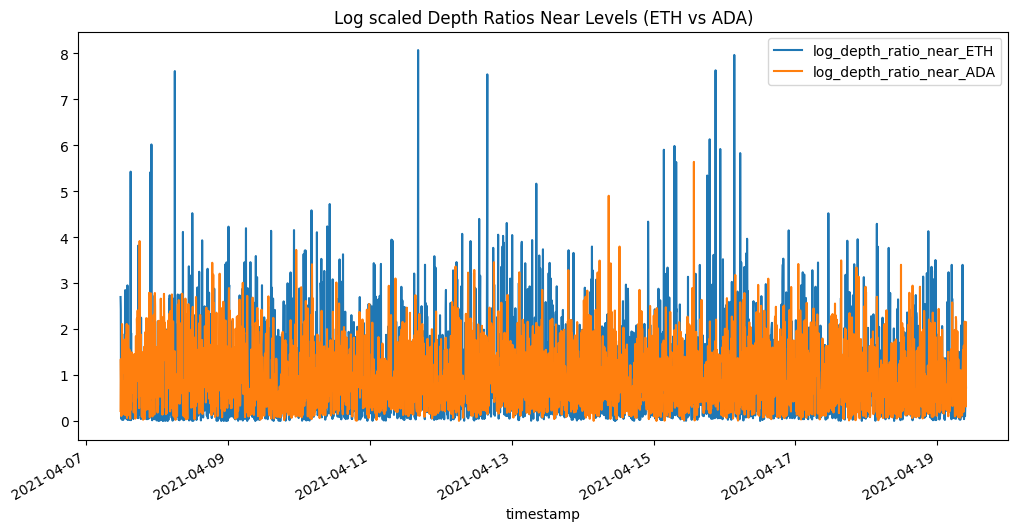

In [44]:
merged_depth_near.plot(x='timestamp', y=[f'log_depth_ratio_near_{asset1}', f'log_depth_ratio_near_{asset2}'], title=f'Log scaled Depth Ratios Near Levels ({asset1} vs {asset2})', figsize=(12, 6))

### 2.6. Exponentially weighted correlation (EWM)

**How it's calculated:**  
Applies exponential weighting to past data when computing covariance and variance, giving more weight to recent observations.

**Interpretation:**  
- **High recent correlation:** assets co-move closely in the short term.  
- **Falling correlation:** decoupling between assets.  
- **Negative correlation:** short-term divergence.  

**Why it matters:**  
Captures rapidly changing relationships and is robust to regime shifts — useful for adaptive trading or TGNN temporal edge weighting.


In [46]:
cov = merged[f'log_return_{asset1}'].ewm(span=24).cov(merged[f'log_return_{asset2}'])
var_asset1 = merged[f'log_return_{asset1}'].ewm(span=24).var()
var_asset2 = merged[f'log_return_{asset2}'].ewm(span=24).var()

merged['ewm_corr'] = cov / np.sqrt(var_asset1 * var_asset2)
merged[['timestamp', 'ewm_corr']].dropna().tail()

,timestamp,ewm_corr
3359,2021-04-19 09:25:00+00:00,0.725376
3360,2021-04-19 09:30:00+00:00,0.721308
3361,2021-04-19 09:35:00+00:00,0.731679
3362,2021-04-19 09:40:00+00:00,0.687663
3363,2021-04-19 09:45:00+00:00,0.691738


<Axes: title={'center': 'Exponentially Weighted Correlation (ETH vs ADA)'}, xlabel='timestamp'>

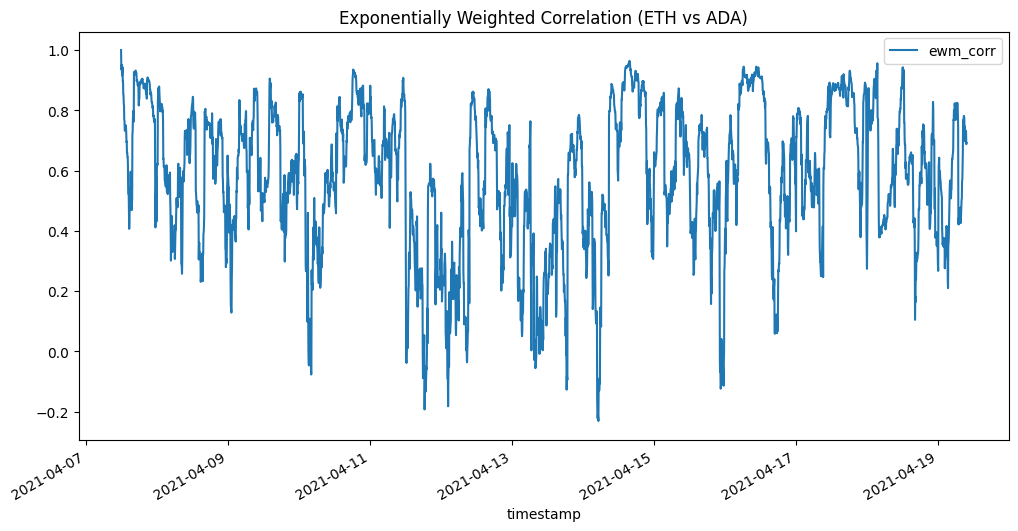

In [47]:
merged[['timestamp', 'ewm_corr']].dropna().plot(x='timestamp', y='ewm_corr', title=f'Exponentially Weighted Correlation ({asset1} vs {asset2})', figsize=(12, 6))

## 3. Exploring ADA <-> BTC

In [49]:
asset1 = 'ADA'
asset2 = 'BTC'

# Align data by timestamp
merged = pd.merge(dfs[asset1][['timestamp', 'midpoint', 'log_return']], dfs[asset2][['timestamp', 'midpoint', 'log_return']], on='timestamp', suffixes=(f'_{asset1}', f'_{asset2}'))

### 3.1. Pearson correlation (static & rolling)


**How it's calculated:**  
Pearson correlation measures the linear relationship between two variables:
$$
\rho = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y}
$$

**Interpretation:**  
- **High positive (→ +1):** assets move together (both rise or fall).  
- **Near zero:** no linear relation, movements are mostly independent.  
- **Negative (→ -1):** assets move in opposite directions.  

**Why it matters:**  
Shows how synchronized two markets are over time; rolling version reveals changing correlations during different volatility regimes.


In [50]:

# Pearson correlation (static)
pearson_corr = merged[f'midpoint_{asset1}'].corr(merged[f'midpoint_{asset2}'])
print(f"Pearson correlation ({asset1} vs {asset2}): {pearson_corr:.4f}")

# Rolling Pearson correlation (e.g., 3-hour window)
merged['rolling_corr'] = merged[f'midpoint_{asset1}'].rolling(window=36).corr(merged[f'midpoint_{asset2}'])
merged[['timestamp', 'rolling_corr']].dropna().tail()

Pearson correlation (ADA vs BTC): 0.8376


,timestamp,rolling_corr
3360,2021-04-19 09:25:00+00:00,0.645107
3361,2021-04-19 09:30:00+00:00,0.683095
3362,2021-04-19 09:35:00+00:00,0.709154
3363,2021-04-19 09:40:00+00:00,0.730792
3364,2021-04-19 09:45:00+00:00,0.758592


<Axes: title={'center': 'Rolling Pearson Correlation (ADA vs BTC)'}, xlabel='timestamp'>

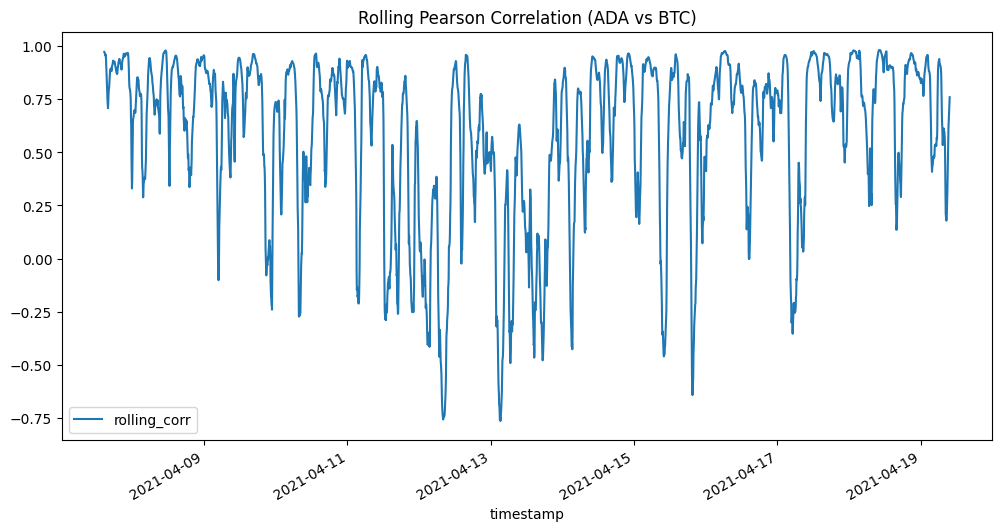

In [51]:
merged[['timestamp', 'rolling_corr']].dropna().plot(x='timestamp', y='rolling_corr', title=f'Rolling Pearson Correlation ({asset1} vs {asset2})', figsize=(12, 6))

### 3.2. Lead-lag correlation (cross-correlation)

**How it's calculated:**  
Cross-correlation compares one series with time-shifted versions of another to find where correlation peaks.  

**Interpretation:**  
- **Positive lag peak:** the second asset reacts *after* the first → possible causality.  
- **Negative lag peak:** the first reacts *after* the second.  
- **Flat curve:** no time-delayed relationship.  

**Why it matters:**  
Helps detect which asset leads or follows market movements — key for forecasting and inter-asset influence modeling.

In [52]:
merged[1:].head() # to avoid NaN in log returns

,timestamp,midpoint_ADA,log_return_ADA,midpoint_BTC,log_return_BTC,rolling_corr
1,2021-04-07 11:43:00+00:00,1.18390,0.009633,56111.655,0.003779,NaN
2,2021-04-07 11:48:00+00:00,1.17830,-0.004741,56100.015,-0.000207,NaN
3,2021-04-07 11:53:00+00:00,1.18150,0.002712,56163.445,0.001130,NaN
4,2021-04-07 11:58:00+00:00,1.19330,0.009938,56229.995,0.001184,NaN
5,2021-04-07 12:03:00+00:00,1.18365,-0.008120,56119.455,-0.001968,NaN


In [53]:
# Cross-correlation
x = merged[f'log_return_{asset1}'][1:] - merged[f'log_return_{asset1}'][1:].mean()
y = merged[f'log_return_{asset2}'][1:] - merged[f'log_return_{asset2}'][1:].mean()
lags = np.arange(-len(x) + 1, len(x))
xcorr = correlate(x, y, mode='full') / (np.std(x) * np.std(y) * len(x))

# Lag with max correlation
best_lag = lags[np.argmax(xcorr)]
print(f"Max correlation at lag: {best_lag} steps ({best_lag*5} min shift)")


Max correlation at lag: 0 steps (0 min shift)


### 3.3. Correlation of returns

**How it's calculated:**  
Pearson correlation applied to **log-returns** instead of prices:  
$$
r_t = \ln(P_t) - \ln(P_{t-1})
$$

**Interpretation:**  
- **High:** assets experience similar price changes.  
- **Low:** price movements are uncorrelated.  
- **Negative:** assets tend to move in opposite directions.  

**Why it matters:**  
Return correlations are more stable and meaningful than price correlations since returns are stationary.


In [54]:
# Pearson correlation of log returns
ret_corr = merged[f'log_return_{asset1}'].corr(merged[f'log_return_{asset2}'])
print(f"Return correlation ({asset1} vs {asset2}): {ret_corr:.4f}")

# Rolling version (e.g., 1 hour = 12 points)
merged['rolling_return_corr'] = merged[f'log_return_{asset1}'].rolling(12).corr(merged[f'log_return_{asset2}'])
merged[['timestamp', 'rolling_return_corr']].dropna().tail()


Return correlation (ADA vs BTC): 0.5409


,timestamp,rolling_return_corr
3360,2021-04-19 09:25:00+00:00,0.815006
3361,2021-04-19 09:30:00+00:00,0.795369
3362,2021-04-19 09:35:00+00:00,0.635394
3363,2021-04-19 09:40:00+00:00,0.630067
3364,2021-04-19 09:45:00+00:00,0.653372


<Axes: title={'center': '1-hour Rolling Return Correlation (ADA vs BTC)'}, xlabel='timestamp'>

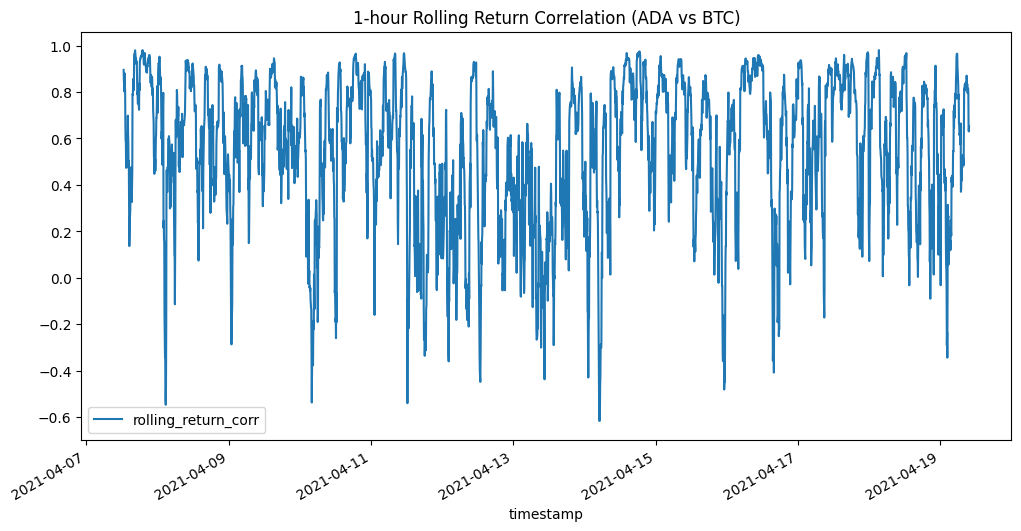

In [55]:
merged[['timestamp', 'rolling_return_corr']].dropna().plot(x='timestamp', y='rolling_return_corr', title=f'1-hour Rolling Return Correlation ({asset1} vs {asset2})', figsize=(12, 6))

### 3.4. Order Imbalance (OI)

**How it's calculated:**  
$$
OI = \frac{\text{Total Bid Volume} - \text{Total Ask Volume}}{\text{Total Bid Volume} + \text{Total Ask Volume}}
$$

**Interpretation:**  
- **Positive:** buy-side pressure (more bids).  
- **Negative:** sell-side pressure (more asks).  
- **Near zero:** balanced market.  

**Why it matters:**  
Captures short-term supply–demand dynamics; strong imbalances often precede price movements or volatility shifts.


In [56]:
# Correlation of OI between assets
merged_oi = pd.merge(dfs[asset1][['timestamp', 'order_imbalance_full', 'order_imbalance_near']], dfs[asset2][['timestamp', 'order_imbalance_full', 'order_imbalance_near']], on='timestamp', suffixes=(f'_{asset1}', f'_{asset2}'))
oi_full_corr = merged_oi[f'order_imbalance_full_{asset1}'].corr(merged_oi[f'order_imbalance_full_{asset2}'])
print(f"Full order imbalance correlation ({asset1} vs {asset2}): {oi_full_corr:.4f}")

oi_near_corr = merged_oi[f'order_imbalance_near_{asset1}'].corr(merged_oi[f'order_imbalance_near_{asset2}'])
print(f"Near order imbalance correlation ({asset1} vs {asset2}): {oi_near_corr:.4f}")

Full order imbalance correlation (ADA vs BTC): 0.0081
Near order imbalance correlation (ADA vs BTC): 0.0495


### 3.5. Depth Ratio

**How it's calculated:**  
$$
DR = \frac{\text{Total Bid Volume}}{\text{Total Ask Volume}}
$$

**Interpretation:**  
- **High (>1):** market depth dominated by buyers.  
- **Low (<1):** dominated by sellers.  
- **Around 1:** balanced liquidity.  

**Why it matters:**  
Represents liquidity asymmetry; correlated depth ratios across assets may indicate shared market-maker behavior or systemic pressure.


In [57]:
# Correlation of depth ratios between assets
merged_depth_near = pd.merge(dfs[asset1][['timestamp', 'depth_ratio_near']], dfs[asset2][['timestamp', 'depth_ratio_near']], on='timestamp', suffixes=(f'_{asset1}', f'_{asset2}'))
depth_corr_near = merged_depth_near[f'depth_ratio_near_{asset1}'].corr(merged_depth_near[f'depth_ratio_near_{asset2}'])  

merged_depth_full = pd.merge(dfs[asset1][['timestamp', 'depth_ratio_full']], dfs[asset2][['timestamp', 'depth_ratio_full']], on='timestamp', suffixes=(f'_{asset1}', f'_{asset2}'))
depth_corr_full = merged_depth_full[f'depth_ratio_full_{asset1}'].corr(merged_depth_full[f'depth_ratio_full_{asset2}'])  

print(f"Depth ratio correlation (near levels) ({asset1} vs {asset2}): {depth_corr_near:.4f}")
print(f"Depth ratio correlation (full levels) ({asset1} vs {asset2}): {depth_corr_full:.4f}")

Depth ratio correlation (near levels) (ADA vs BTC): 0.0090
Depth ratio correlation (full levels) (ADA vs BTC): -0.0166


In [58]:
merged_depth_near[f'log_depth_ratio_near_{asset1}'] = np.log1p(merged_depth_near[f'depth_ratio_near_{asset1}'])
merged_depth_near[f'log_depth_ratio_near_{asset2}'] = np.log1p(merged_depth_near[f'depth_ratio_near_{asset2}'])
merged_depth_near.head()

,timestamp,depth_ratio_near_ADA,depth_ratio_near_BTC,log_depth_ratio_near_ADA,log_depth_ratio_near_BTC
0,2021-04-07 11:38:00+00:00,0.243418,0.018981,0.217864,0.018803
1,2021-04-07 11:43:00+00:00,2.836668,0.348026,1.344604,0.298641
2,2021-04-07 11:48:00+00:00,1.445783,0.503307,0.894365,0.407668
3,2021-04-07 11:53:00+00:00,0.114285,0.104620,0.108213,0.099501
4,2021-04-07 11:58:00+00:00,2.582360,0.046015,1.276022,0.044988


<Axes: title={'center': 'Log scaled Depth Ratios Near Levels (ADA vs BTC)'}, xlabel='timestamp'>

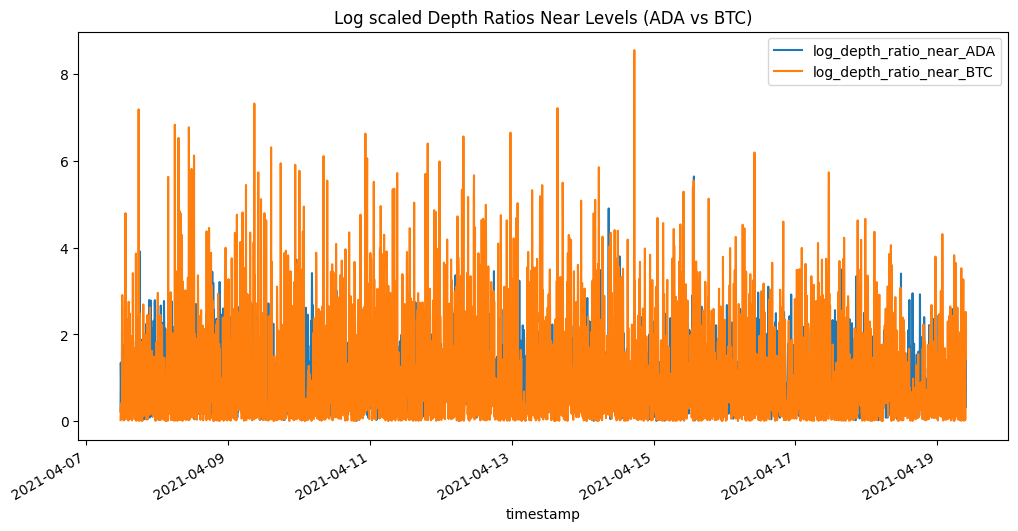

In [59]:
merged_depth_near.plot(x='timestamp', y=[f'log_depth_ratio_near_{asset1}', f'log_depth_ratio_near_{asset2}'], title=f'Log scaled Depth Ratios Near Levels ({asset1} vs {asset2})', figsize=(12, 6))

### 3.6. Exponentially weighted correlation (EWM)

**How it's calculated:**  
Applies exponential weighting to past data when computing covariance and variance, giving more weight to recent observations.

**Interpretation:**  
- **High recent correlation:** assets co-move closely in the short term.  
- **Falling correlation:** decoupling between assets.  
- **Negative correlation:** short-term divergence.  

**Why it matters:**  
Captures rapidly changing relationships and is robust to regime shifts — useful for adaptive trading or TGNN temporal edge weighting.


In [60]:
cov = merged[f'log_return_{asset1}'].ewm(span=24).cov(merged[f'log_return_{asset2}'])
var_asset1 = merged[f'log_return_{asset1}'].ewm(span=24).var()
var_asset2 = merged[f'log_return_{asset2}'].ewm(span=24).var()

merged['ewm_corr'] = cov / np.sqrt(var_asset1 * var_asset2)
merged[['timestamp', 'ewm_corr']].dropna().tail()

,timestamp,ewm_corr
3360,2021-04-19 09:25:00+00:00,0.718537
3361,2021-04-19 09:30:00+00:00,0.719418
3362,2021-04-19 09:35:00+00:00,0.713036
3363,2021-04-19 09:40:00+00:00,0.708951
3364,2021-04-19 09:45:00+00:00,0.712892


<Axes: title={'center': 'Exponentially Weighted Correlation (ADA vs BTC)'}, xlabel='timestamp'>

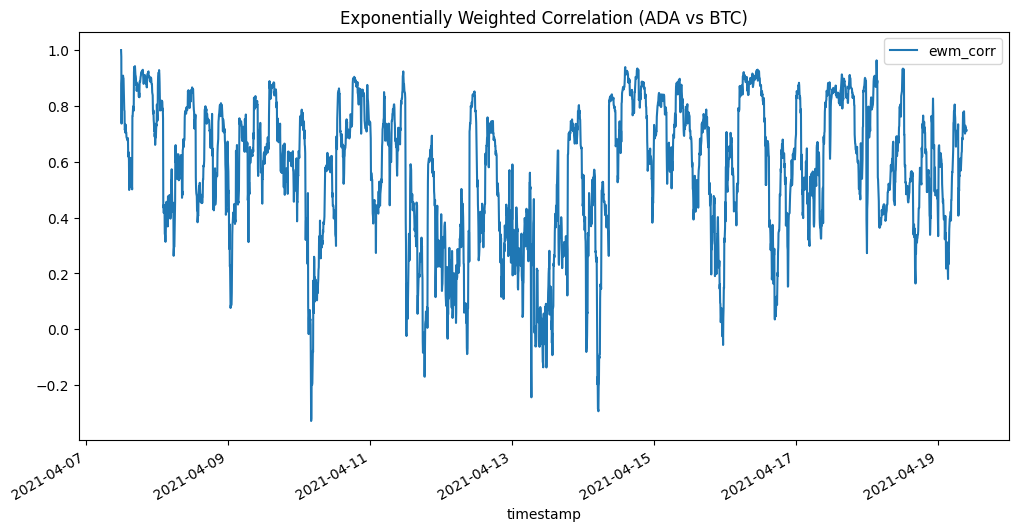

In [61]:
merged[['timestamp', 'ewm_corr']].dropna().plot(x='timestamp', y='ewm_corr', title=f'Exponentially Weighted Correlation ({asset1} vs {asset2})', figsize=(12, 6))